Reproduce Fig2: Pearson based and STTC based area ACFs and timescales.

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, OptimizeWarning
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
fig_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fig_drafts\\'

### Get the data

In [3]:
results_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fixation_period_1000ms\\'

#### ACF

In [4]:
pfdl_dataset_constraints_df = pd.read_pickle(results_folder + 'pfdl_dataset_constraints_df.pkl')
pfp_dataset_constraints_df = pd.read_pickle(results_folder + 'pfp_dataset_constraints_df.pkl')

In [13]:
def load_constraints_acf_df(file_name_, dataset_constraints_df_):
    pfdl_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder + file_name_ + '.pkl')    
    # get subsets based on constraints 
    dataset_constraints_subset_df = dataset_constraints_df_.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1').copy()
    
    # join
    pfdl_acf_average_trial_pearsonr_subset_df = dataset_constraints_subset_df.merge(pfdl_acf_average_trial_pearsonr_df, 
                                                                                  on='unit_id', how='left')
    pfdl_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)
    
    
    # check NaNs
    
    print('N neurons: {}'.format(len(pfdl_acf_average_trial_pearsonr_subset_df)))
    
    # print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_pearsonr_subset_df.isnull().any().any()))

    return pfdl_acf_average_trial_pearsonr_subset_df

In [6]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags)]

In [15]:
# for pfdl pearson
n_runs = 10

pfdl_pearson_tau_ms_l, pfdl_pearson_fit_r_squared_l = [], []
for i in range(n_runs):
    file_name = 'binned\\pfdl\\acf\\trials20\\acf_average_trial_pearsonr_with_empty_50ms_20lags_df' + str(i)
    acf_df = load_constraints_acf_df(file_name, pfdl_dataset_constraints_df)
    acf_2d = acf_df[acf_cols].values
    acf_mean = np.nanmean(acf_2d, axis=0)
    tau, popt, fit_r_squared = calc_tau_area_mean(acf_mean, start_idx_=2)
    tau_ms = tau*50
    print('tau {}, popt {}, fit_r_squared {}'.format(tau_ms, popt, fit_r_squared))
    pfdl_pearson_tau_ms_l.append(tau_ms)
    pfdl_pearson_fit_r_squared_l.append(fit_r_squared)

N neurons: 351
tau 264.0510122866435, popt [0.23525749 0.18935735 0.16133814], fit_r_squared 0.9722869677062457
N neurons: 351
tau 226.83223270856305, popt [0.25278372 0.22042723 0.16532943], fit_r_squared 0.9731595635885224
N neurons: 351
tau 225.48715441628562, popt [0.24991273 0.22174212 0.17519134], fit_r_squared 0.974927469918426
N neurons: 351
tau 224.34757049430885, popt [0.25241356 0.22286847 0.1897849 ], fit_r_squared 0.9879665110706146
N neurons: 351
tau 238.98918346893646, popt [0.24200419 0.20921449 0.17360399], fit_r_squared 0.9747749614876939
N neurons: 351
tau 218.71732035984778, popt [0.26191321 0.22860558 0.16657165], fit_r_squared 0.9873877016951508
N neurons: 351
tau 226.05258956383224, popt [0.26170332 0.22118747 0.13981052], fit_r_squared 0.9852625804548414
N neurons: 351
tau 301.14456569808596, popt [0.23942394 0.16603321 0.11876903], fit_r_squared 0.9904445249292932
N neurons: 351
tau 196.3441069962118, popt [0.2597535  0.25465496 0.20224544], fit_r_squared 0.978

In [33]:
# for pfdl sttc
n_runs = 50

pfdl_sttc_tau_ms_l, pfdl_sttc_fit_r_squared_l = [], []
for i in range(n_runs):
    file_name = 'non_binned\\pfdl\\acf\\trials20\\acf_average_trial_sttc_with_empty_50ms_20lags_51padding_df' + str(i)
    acf_df = load_constraints_acf_df(file_name, pfdl_dataset_constraints_df)
    acf_2d = acf_df[acf_cols].values
    acf_mean = np.nanmean(acf_2d, axis=0)
    tau, popt, fit_r_squared = calc_tau_area_mean(acf_mean, start_idx_=2)
    tau_ms = tau*50
    print('tau {}, popt {}, fit_r_squared {}'.format(tau_ms, popt, fit_r_squared))
    pfdl_sttc_tau_ms_l.append(tau_ms)
    pfdl_sttc_fit_r_squared_l.append(fit_r_squared)

N neurons: 351
tau 317.46445120144745, popt [0.13659671 0.15749795 0.27494121], fit_r_squared 0.9399323635678472
N neurons: 351
tau 254.29435272808155, popt [0.13319553 0.19662253 0.3386878 ], fit_r_squared 0.9750382807648225
N neurons: 351
tau 219.18075217059632, popt [0.15073374 0.22812222 0.28042635], fit_r_squared 0.9785081522721256
N neurons: 351
tau 192.44299692051797, popt [0.14486712 0.2598172  0.3523836 ], fit_r_squared 0.9682220305765693
N neurons: 351
tau 233.86907685884512, popt [0.14187836 0.21379483 0.34119898], fit_r_squared 0.9840371588180256
N neurons: 351
tau 218.63029323863503, popt [0.14579178 0.22869658 0.33126312], fit_r_squared 0.9505567723321656
N neurons: 351
tau 229.37313784352193, popt [0.14306461 0.21798542 0.28992146], fit_r_squared 0.9825005262346428
N neurons: 351
tau 199.26187523455718, popt [0.15018195 0.25092607 0.35931008], fit_r_squared 0.9514692165004588
N neurons: 351
tau 193.65100704639306, popt [0.16538221 0.25819644 0.28846023], fit_r_squared 0.

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fixation_period_1000ms\\non_binned\\pfdl\\acf\\trials20\\acf_average_trial_sttc_with_empty_50ms_20lags_51padding_df10.pkl'

In [34]:
# for pfp pearson
n_runs = 50

pfp_pearson_tau_ms_l, pfp_pearson_fit_r_squared_l = [], []
for i in range(n_runs):
    file_name = 'binned\\pfp\\acf\\trials20\\acf_average_trial_pearsonr_with_empty_50ms_20lags_df' + str(i)
    acf_df = load_constraints_acf_df(file_name, pfdl_dataset_constraints_df)
    acf_2d = acf_df[acf_cols].values
    acf_mean = np.nanmean(acf_2d, axis=0)
    tau, popt, fit_r_squared = calc_tau_area_mean(acf_mean, start_idx_=2)
    tau_ms = tau*50
    print('tau {}, popt {}, fit_r_squared {}'.format(tau_ms, popt, fit_r_squared))
    pfp_pearson_tau_ms_l.append(tau_ms)
    pfp_pearson_fit_r_squared_l.append(fit_r_squared)

N neurons: 351
tau 302.221580852587, popt [0.20264334 0.16544153 0.1933355 ], fit_r_squared 0.9701203330906831
N neurons: 351
tau 274.9523028523413, popt [0.22339736 0.18184972 0.16563919], fit_r_squared 0.9638277850666725
N neurons: 351
tau 249.99290695849768, popt [0.19438028 0.20000567 0.22940554], fit_r_squared 0.9574430129117256
N neurons: 351
tau 222.15279417923375, popt [0.23375587 0.22507032 0.17547986], fit_r_squared 0.9609536145825415
N neurons: 351
tau 295.2004417273509, popt [0.21581759 0.16937644 0.12942685], fit_r_squared 0.968185254639518
N neurons: 351
tau 226.26907522540458, popt [0.25354891 0.22097584 0.15877663], fit_r_squared 0.9766978858563398
N neurons: 351
tau 321.8938499920088, popt [0.19991536 0.15533071 0.19017587], fit_r_squared 0.8931074651206383
N neurons: 351
tau 213.99748333258012, popt [0.24543747 0.23364761 0.20037017], fit_r_squared 0.9284716997303382
N neurons: 351
tau 241.96555443954418, popt [0.22990791 0.20664098 0.18602171], fit_r_squared 0.947869

In [44]:
# for pfp sttc
n_runs = 50

pfp_sttc_tau_ms_l, pfp_sttc_fit_r_squared_l = [], []
for i in range(n_runs):
    file_name = 'non_binned\\pfp\\acf\\trials20\\acf_average_trial_sttc_with_empty_50ms_20lags_51padding_df' + str(i)
    acf_df = load_constraints_acf_df(file_name, pfdl_dataset_constraints_df)
    acf_2d = acf_df[acf_cols].values
    acf_mean = np.nanmean(acf_2d, axis=0)
    tau, popt, fit_r_squared = calc_tau_area_mean(acf_mean, start_idx_=2)
    tau_ms = tau*50
    print('tau {}, popt {}, fit_r_squared {}'.format(tau_ms, popt, fit_r_squared))
    pfp_sttc_tau_ms_l.append(tau_ms)
    pfp_sttc_fit_r_squared_l.append(fit_r_squared)

N neurons: 351
tau 239.90790228617334, popt [0.09018374 0.20841331 0.32680793], fit_r_squared 0.9430219418673312
N neurons: 351
tau 293.6446922490115, popt [0.08645884 0.17027381 0.28801984], fit_r_squared 0.9548167562616335
N neurons: 351
tau 273.97398567774843, popt [0.07779072 0.18249908 0.31969078], fit_r_squared 0.9189264364273314
N neurons: 351
tau 199.93246570127175, popt [0.09309857 0.25008445 0.33209471], fit_r_squared 0.9750559443872916
N neurons: 351
tau 304.95433830169844, popt [0.08051938 0.16395897 0.2714877 ], fit_r_squared 0.9548808570875534
N neurons: 351
tau 209.46621462141465, popt [0.08740814 0.23870198 0.34639916], fit_r_squared 0.9030734767106465
N neurons: 351
tau 266.5046479976701, popt [0.08559906 0.18761399 0.31167363], fit_r_squared 0.9196310638080541
N neurons: 351
tau 217.909264156566, popt [0.09310428 0.2294533  0.30721546], fit_r_squared 0.9569121155029351
N neurons: 351
tau 285.8348582088498, popt [0.0837303  0.17492618 0.27774362], fit_r_squared 0.97253

### Calculate tau

In [10]:
def func_single_exp(x, a, b, c):
    """
    Exponential function to fit the data.
    :param x: 1d array, independent variable
    :param a: float, parameter to fit
    :param b: float, parameter to fit
    :param c: float, parameter to fit
    :return: callable
    """
    #return a * np.exp(-b * x) + c
    return a * (np.exp(-b * x) + c) # as in the paper

In [11]:
def calc_tau_area_mean(acf_mean_, start_idx_=1):    
    t = np.linspace(0, len(acf_mean_)-1, len(acf_mean_)).astype(int)
    # print(t)
    
    popt, pcov = curve_fit(func_single_exp, t[start_idx_:], acf_mean_[start_idx_:], maxfev=1000000000) # I used 5000, now it is like in Siegle
    tau = 1 / popt[1]
    
    # fit r-squared
    y_pred = func_single_exp(t[start_idx_:], *popt)
    fit_r_squared = r2_score(acf_mean_[start_idx_:], y_pred)

    return tau, popt, fit_r_squared

### Plot

In [ ]:
save_fig = False

In [47]:
pfp_sttc_tau_ms_l = [tau for tau in pfp_sttc_tau_ms_l if tau > 0]

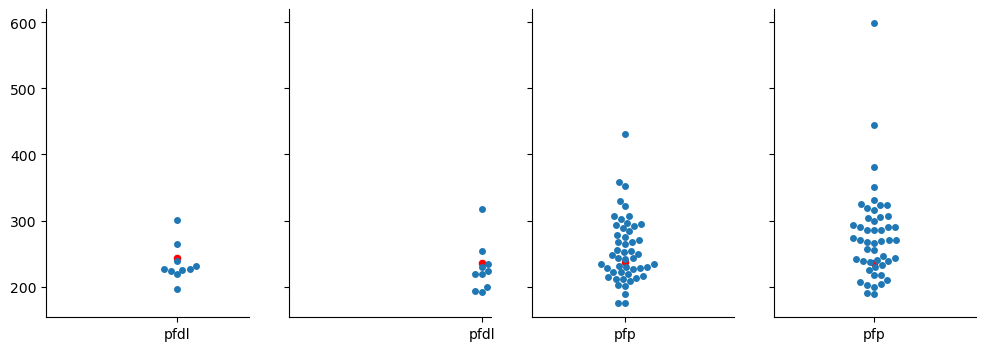

In [49]:
fig, axes = plt.subplots(1,4, figsize=(12,4), sharey=True)

sns.swarmplot(ax=axes[0], x=['pfdl']*10, y=np.asarray(pfdl_pearson_tau_ms_l))
sns.swarmplot(ax=axes[1], x=['pfdl']*10, y=np.asarray(pfdl_sttc_tau_ms_l))

sns.scatterplot(ax=axes[0], x=['pfdl'], y=244, color='red')
sns.scatterplot(ax=axes[1], x=['pfdl'], y=236, color='red')

sns.swarmplot(ax=axes[2], x=['pfp']*50, y=np.asarray(pfp_pearson_tau_ms_l))
sns.swarmplot(ax=axes[3], x=['pfp']*len(pfp_sttc_tau_ms_l), y=np.asarray(pfp_sttc_tau_ms_l))

sns.scatterplot(ax=axes[2], x=['pfp'], y=237, color='red')
sns.scatterplot(ax=axes[3], x=['pfp'], y=235, color='red')

sns.despine()

# if save_fig:
#     fig.savefig(fig_folder + 'fig2_repr_pearson_and_sttc_with_empty_0_1000_51padding.png', bbox_inches='tight')
#     fig.savefig(fig_folder + 'fig2_repr_pearson_and_sttc_with_empty_0_1000_51padding.svg', bbox_inches='tight')